In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Polygon
%matplotlib notebook
from ipywidgets import interact, interactive, fixed, interact_manual

We compiled the US States (and Washington DC) tax rates into one dataset from 2000-2023 based on the available information from the US Government. Then we added added it as a pandas DataFrame and rounded the numbers. 

In [2]:
df = pd.read_csv("taxrates.csv")
df = df.rename(columns={"State":"NAME", "STUSPS": "STATE"}).round(2)
df.head()

,NAME,STATE,2000,2001,2002,2003,2004,2005,2006,2007,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Alabama,AL,5.00,5.00,6.00,5.00,6.50,6.50,6.50,6.50,...,6.50,6.50,6.50,6.50,6.50,6.50,6.50,6.50,6.50,6.50
1,Alaska,AK,5.20,5.20,5.44,5.44,5.44,5.44,5.44,5.44,...,5.44,5.34,5.34,5.34,5.34,5.34,5.34,5.34,5.34,5.34
2,Arizona,AZ,8.00,7.97,6.97,6.97,6.97,6.97,6.97,6.97,...,6.50,5.50,5.50,4.90,4.90,4.90,4.90,4.90,4.90,4.90
3,Arkansas,AR,3.75,3.75,3.92,3.92,3.92,3.92,3.92,3.92,...,3.92,3.92,3.92,3.92,3.92,3.92,3.92,3.87,3.65,3.55
4,California,CA,8.84,8.84,8.84,8.84,8.84,8.84,8.84,8.84,...,8.84,8.84,8.84,8.84,8.84,8.84,8.84,8.84,8.84,8.84


To get an idea of the changes in the tax rates of each state, we transpose the data and plot a line graph using matplotlib.

In [3]:
df_t = df.T 
df_t.columns=df_t.iloc[0]
df_t = df_t.tail(-2)
df_t.head()


NAME,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,District of Columbia
2000,5.0,5.2,8.0,3.75,8.84,4.75,8.5,8.7,5.5,6.0,...,6.0,0.0,5.0,8.38,6.0,0.0,9.0,7.9,0.0,9.98
2001,5.0,5.2,7.97,3.75,8.84,4.63,7.5,8.7,5.5,6.0,...,6.0,0.0,5.0,8.38,6.0,0.0,9.0,7.9,0.0,9.98
2002,6.0,5.44,6.97,3.92,8.84,4.63,7.5,8.7,5.5,6.0,...,6.0,0.0,5.0,8.51,6.0,0.0,9.0,7.9,0.0,9.5
2003,5.0,5.44,6.97,3.92,8.84,4.63,7.5,8.7,5.5,6.0,...,6.0,0.0,5.0,8.51,6.0,0.0,9.0,7.9,0.0,9.5
2004,6.5,5.44,6.97,3.92,8.84,4.63,7.5,8.7,5.5,6.0,...,6.5,0.0,5.0,8.51,6.0,0.0,9.0,7.9,0.0,9.98


In [ ]:
# plot the data
ax = df_t.plot(figsize=(40,15))

# set x-axis label and values
ax.set_xlabel("Time")
ax.set_ylabel("Tax rate(%)")

plt.show()

In [5]:
shapefile = 's_08mr23/s_08mr23.shp'
gdf = gpd.read_file(shapefile)
gdf

,STATE,NAME,FIPS,LON,LAT,geometry
0,AL,Alabama,01,-86.826760,32.793540,"MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ..."
1,AR,Arkansas,05,-92.439200,34.899770,"POLYGON ((-91.62986 36.49921, -91.62849 36.499..."
2,AS,American Samoa,60,-170.372150,-14.264860,"MULTIPOLYGON (((-168.14924 -14.53377, -168.148..."
3,AZ,Arizona,04,-111.664570,34.293230,"POLYGON ((-110.49090 37.00361, -110.48750 37.0..."
4,CA,California,06,-119.608180,37.245370,"MULTIPOLYGON (((-118.42620 32.79973, -118.4263..."
5,CO,Colorado,08,-105.547830,38.998550,"POLYGON ((-106.87560 41.00301, -106.85850 41.0..."
6,CT,Connecticut,09,-72.726230,41.621960,"MULTIPOLYGON (((-73.62247 40.98430, -73.62209 ..."
7,DC,District of Columbia,11,-77.014640,38.909320,"MULTIPOLYGON (((-77.03097 38.80826, -77.03110 ..."
8,DE,Delaware,10,-75.505920,38.995590,"MULTIPOLYGON (((-75.22731 38.58854, -75.22744 ..."
9,FL,Florida,12,-82.509340,28.674020,"MULTIPOLYGON (((-81.96339 24.52110, -81.96374 ..."


In [6]:
#drop Puerto rico, Fed States of Micronesia, American Samoa, US Virgin Islands, Guam, Commonwealth of the northern mariana islands from file
gdf = gdf.drop(index=[2,37,44,52,54,55,56,57])
gdf = gdf.reset_index(drop=True)

In [7]:
len(gdf)

51

<Axes: >

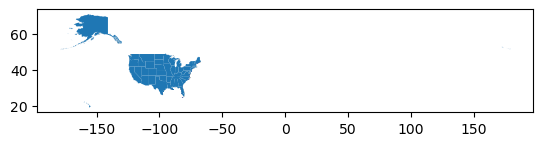

In [8]:
gdf.plot()

Creating the merged dataset that will include the Tax rate as a column

In [9]:
df_test = df[['STATE','2022']].copy()
df_test.head()

,STATE,2022
0,AL,6.50
1,AK,5.34
2,AZ,4.90
3,AR,3.65
4,CA,8.84


We are going to clip Hawaii and Alaska and add them separately. 

<Axes: >

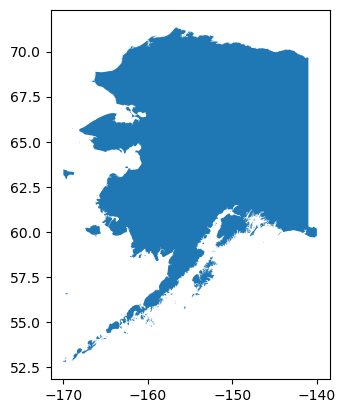

In [10]:
alaska_gdf = gdf[gdf.STATE=='AK']
alaska_gdf = alaska_gdf.merge(df_test, on="STATE")
#clipping some of the western islands to make it fit better
polygon = Polygon([(-170,50),(-170,72),(-140, 72),(-140,50)])
alaska_gdf = alaska_gdf.clip(polygon)
alaska_gdf
alaska_gdf.plot()

<Axes: >

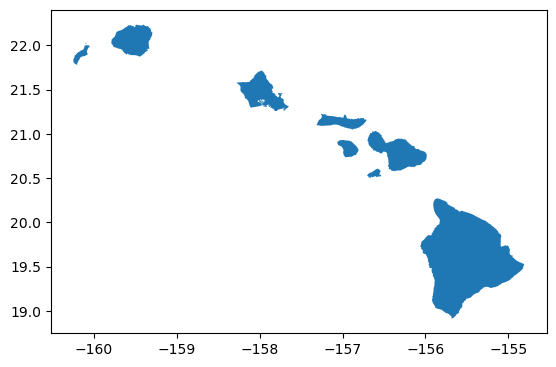

In [11]:
hawaii_gdf = gdf[gdf.STATE=='HI']
hawaii_gdf = hawaii_gdf.merge(df_test, on="STATE")
hawaii_gdf
hawaii_gdf.plot()

Removing Alaska and Hawaii from the table due to mapping errors. Will add back later separately.

In [12]:
gdf_test = gdf.drop(gdf[gdf['STATE'] == 'AK'].index)
gdf_test = gdf_test.drop(gdf_test[gdf_test['STATE'] == 'HI'].index)
len(gdf_test)

49

Creating the merged dataset that will include the Tax rate as a column

In [13]:
df_test = df[['STATE','2022']].copy()
df_test.head()

,STATE,2022
0,AL,6.50
1,AK,5.34
2,AZ,4.90
3,AR,3.65
4,CA,8.84


In [14]:
gdf_new = gdf_test.merge(df_test, on="STATE")
gdf_new

,STATE,NAME,FIPS,LON,LAT,geometry,2022
0,AL,Alabama,01,-86.82676,32.79354,"MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ...",6.50
1,AR,Arkansas,05,-92.43920,34.89977,"POLYGON ((-91.62986 36.49921, -91.62849 36.499...",3.65
2,AZ,Arizona,04,-111.66457,34.29323,"POLYGON ((-110.49090 37.00361, -110.48750 37.0...",4.90
3,CA,California,06,-119.60818,37.24537,"MULTIPOLYGON (((-118.42620 32.79973, -118.4263...",8.84
4,CO,Colorado,08,-105.54783,38.99855,"POLYGON ((-106.87560 41.00301, -106.85850 41.0...",4.55
5,CT,Connecticut,09,-72.72623,41.62196,"MULTIPOLYGON (((-73.62247 40.98430, -73.62209 ...",7.50
6,DC,District of Columbia,11,-77.01464,38.90932,"MULTIPOLYGON (((-77.03097 38.80826, -77.03110 ...",8.25
7,DE,Delaware,10,-75.50592,38.99559,"MULTIPOLYGON (((-75.22731 38.58854, -75.22744 ...",8.70
8,FL,Florida,12,-82.50934,28.67402,"MULTIPOLYGON (((-81.96339 24.52110, -81.96374 ...",5.50
9,GA,Georgia,13,-83.44848,32.65155,"MULTIPOLYGON (((-81.49619 30.73234, -81.49648 ...",5.75


Plotting the values on a geographical map we get a heatmap:

<Axes: >

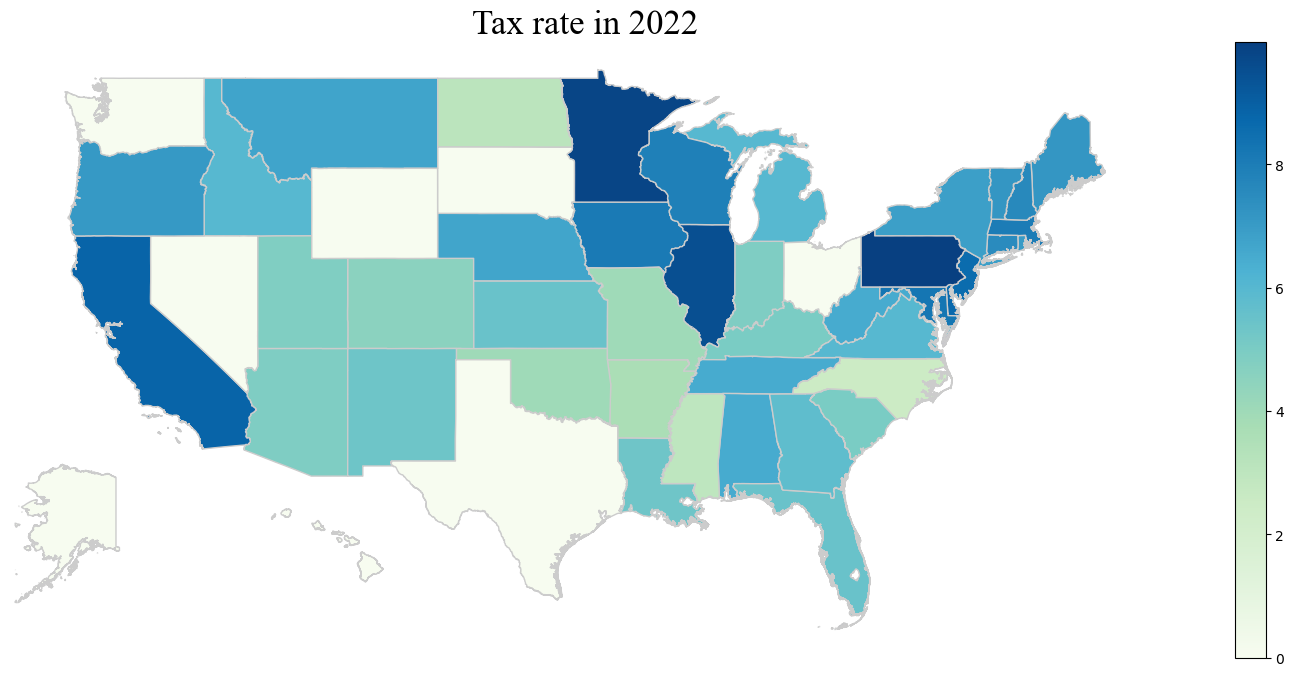

In [15]:
# Print the map
# Set the range for the choropleth
title = 'Tax rate in 2022'
col = '2022'
vmin = gdf_new[col].min()
vmax = gdf_new[col].max()
cmap = 'GnBu'
# Create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 8))
# Remove the axis
ax.axis('off')
gdf_new.plot(column=col, ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap, legend=True)
# Add a title
ax.set_title(title, fontdict={'fontname': 'Times New Roman','fontsize': '25', 'fontweight': '3'})
# Create an annotation for the data source

#Add Alaska
akax = fig.add_axes([0.1, 0.17, 0.2, 0.19])   
akax.axis('off')
alaska_gdf.plot(column=alaska_gdf["2022"], cmap="GnBu", ax=akax, linewidth=1, edgecolor='0.8')

#Add Hawaii
hiax = fig.add_axes([.28, 0.20, 0.1, 0.1])      
hiax.axis('off')
hawaii_gdf.plot(column=hawaii_gdf["2022"], cmap="GnBu", ax=hiax, linewidth=1, edgecolor='0.8')



In [16]:
from matplotlib.widgets import Button, Slider

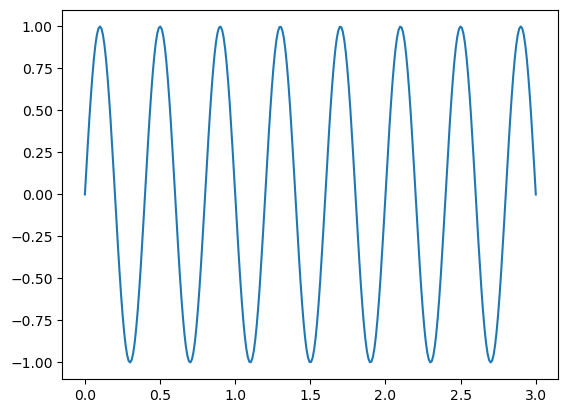

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

x = np.linspace(0, 3, 300)
y = np.sin(5 * np.pi * x)

fig, ax = plt.subplots()
l, = ax.plot(x, y)
plt.show()

In [26]:
fig.subplots_adjust(bottom=0.2)


<IPython.core.display.Javascript object>


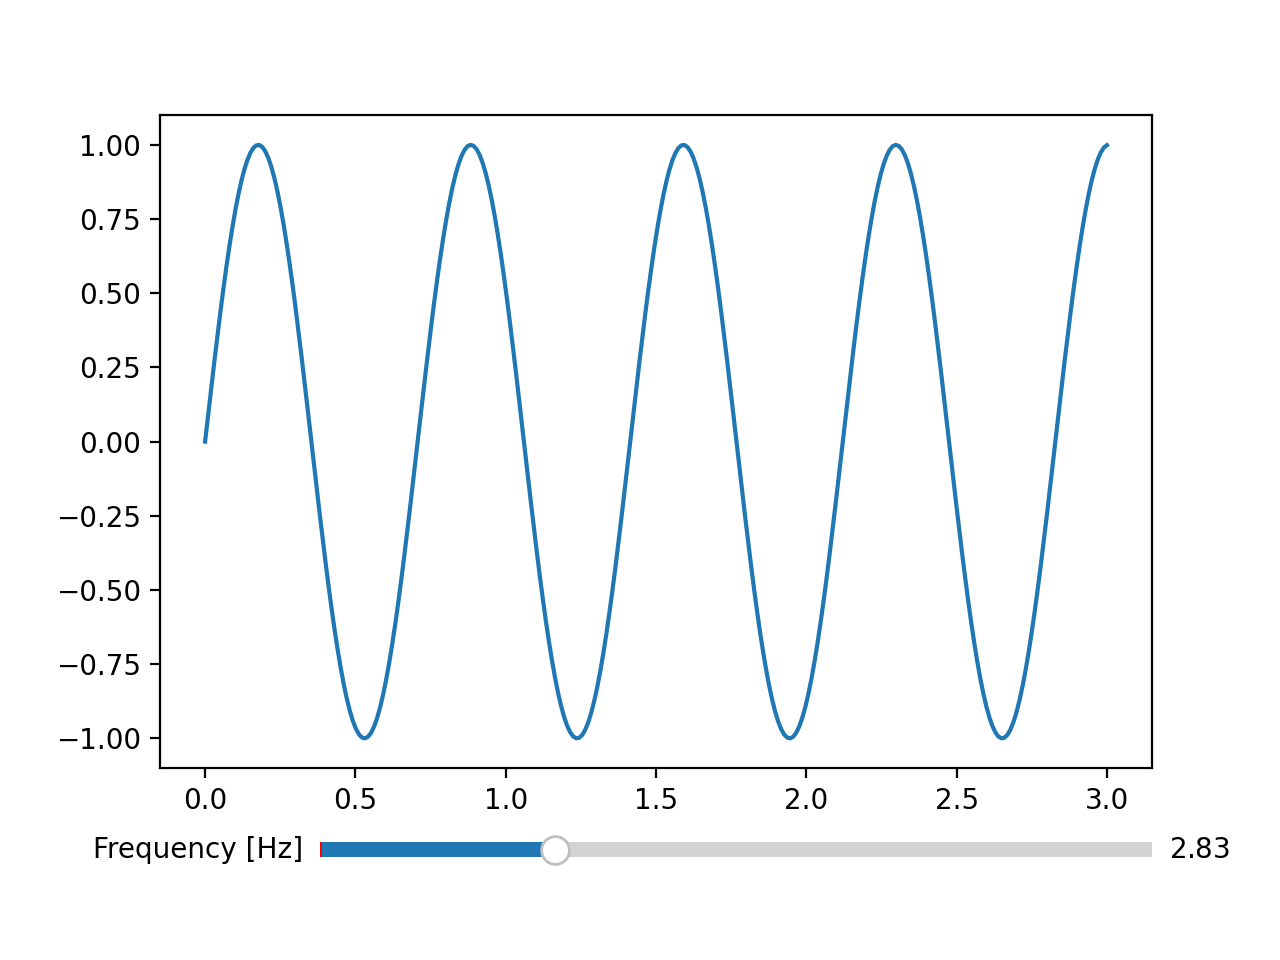

In [29]:
x = np.linspace(0, 3, 300)
y = np.sin(5 * np.pi * x)

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
l, = ax.plot(x, y)

def onChange(value):
    l.set_ydata(np.sin(value * np.pi * x))
    fig.canvas.draw_idle()

slideraxis = fig.add_axes([0.25, 0.1, 0.65, 0.03])
slider = Slider(slideraxis, label='Frequency [Hz]',
                valmin=0, valmax=10, valinit=0)
slider.on_changed(onChange)
plt.show()

In [28]:
from ipywidgets import interact, interactive, fixed, interact_manual
